In [1]:
import pandas as pd

## Abrir corpus de teste e de treinamento 

In [2]:
df_train = pd.read_csv('../data/trainset2.csv', usecols=['normalize', 'posicionamento'])

In [3]:
df_test = pd.read_csv('../data/testset2.csv', usecols=['normalize'])

In [4]:
df_train[:10]

,normalize,posicionamento
0,eu não sinto nem um pingo de vergonha com o di...,esquerda
1,alíquota para as 40 famílias norteamericanas ...,neutro
2,a equipe vermelha,neutro
3,só queria ser fofinha com o giovani igual come...,neutro
4,curso relâmpago de marxismo para manuela dávila,esquerda
5,atençãoo politz trouxe para vocês todos os ví...,neutro
6,jaden smith no lolapaloza,neutro
7,a nossa campanha gratuita continua abaixo mai...,neutro
8,pode vir com tudo,neutro
9,qual o problema de vcs“rachel é patricinha fil...,neutro


## Normalizar os dados


In [5]:
from nlp import normalize

In [6]:
normalizer = normalize.Normalize()

In [7]:
df_testSet= df_test['normalize'].apply(normalizer.normalize)

In [8]:
df_trainSet= df_train['normalize'].apply(normalizer.normalize)

In [9]:
df_trainSet[:10]

0    eu nao sinto nem um pingo de vergonha com o di...
1     aliquota para as 40 familias norteamericanas ...
2                                    a equipe vermelha
3    so queria ser fofinha com o giovani igual come...
4     curso relampago de marxismo para manuela davila 
5     atencao politz trouxe para voces todos os vid...
6                           jaden smith no lolapaloza 
7     a nossa campanha gratuita continua abaixo mai...
8                                    pode vir com tudo
9    qual o problema de vcsrachel e patricinha filh...
Name: normalize, dtype: object

In [10]:
df_testSet[:10]

0     a e a desarticularam organizacao criminosa re...
1     encontro com empresarios chineses e president...
2    a camara aprovou 329x86 o acordo de salvaguard...
3     hotel imperial despedida de tokio obrigado ja...
4     em cadeia nacional de radio e tv o ministro a...
5     buscamos sempre parcerias onde visamos agrega...
6    no grandioso japao nos reunimos com empresario...
7     na america do sul estamos vivendo um momento ...
8     agora a pouco estive com o principe charles p...
9     o na pavimentacao de estradas trabalho bem fe...
Name: normalize, dtype: object

## Transformação dos dados textuais para representação numérica

In [11]:
def normalizarPos(text):
    if text == 'esquerda':
        text = 0
    else:
        if text == 'direita':
            text = 2
        else:
            text = 1
    return text

- Esquerda = 0
- Neutro = 1
- Direita = 2

In [12]:
df_pos = df_train['posicionamento'].apply(normalizarPos)

In [13]:
df_pos.value_counts()

1    1266
0     274
2     247
Name: posicionamento, dtype: int64

In [14]:
df_reviews = df_trainSet.values.tolist()
df_classes = df_pos.values.tolist()
df_test = df_testSet.values.tolist()

In [15]:
len(df_reviews)

1787

In [16]:
len(df_test)

5730

In [17]:
corpus = []
corpus.extend(df_reviews)
corpus.extend(df_test)

In [18]:
type(corpus)

list

- Vetorização dos textos

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit(corpus)

In [21]:
print(vectorizer.get_feature_names())

['01', '01092018', '012', '0120', '0121', '0123', '0126', '0127', '0128', '0129', '0130', '02setembro', '03', '04', '05', '0510', '05102019', '0709', '075desemp', '0798687182', '08', '080hs', '09hs', '10', '101', '1010', '10102019', '1012', '1014', '102018', '1028', '102a', '103no', '107', '10782', '1079art', '108', '109', '10a', '10deoctubre', '10h', '10k', '10min', '10x', '10x0', '12', '120', '12018', '121', '123ninguem', '1270', '12oct', '12outubro', '13', '130', '132', '1320', '135', '13767', '138', '139', '13o', '14', '140h', '141', '1412018', '1418', '1430', '147', '1492', '14h', '14hconfirme', '15', '150', '15072019', '150bpm', '1510', '153', '1547', '157', '159papa', '15min', '16', '162', '163', '1645', '16greysanatomy16', '17', '170', '171', '173', '1730', '1746', '179', '17k', '17mil', '18', '180', '1802150so', '1805', '1809', '184', '1857', '1859', '1895', '18h', '18h30', '19', '190', '1902018', '1902019', '1908', '190olha', '1920', '1923', '1930', '1930our', '1930s', '1931f

In [22]:
train = vectorizer.transform(df_reviews)
test = vectorizer.transform(df_test)

# Treinamento dos modelos

### Decision Tree

In [23]:
from sklearn import tree

In [24]:
DT = tree.DecisionTreeClassifier()
DT = DT.fit(train, df_classes)

### Neural Network

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
NN = MLPClassifier()

In [27]:
NN = NN.fit(train, df_classes)

## Salvar modelos

In [28]:
import pickle

In [29]:
pickle.dump(DT, open('modeloDT.sav', 'wb'))

In [30]:
pickle.dump(NN, open('modeloNN.sav', 'wb'))

## Classificação da base de treinamento

In [31]:
x = DT.predict(test)

In [32]:
y = NN.predict(test)

In [33]:
def fa(c):
    predicoes = {'esquerda': 0, 'neutro': 0, 'direita': 0}
    for valor in c:
        if valor == 0:
            predicoes['esquerda'] += 1
        else:
            if valor == 1:
                predicoes['neutro'] += 1
            else:
                if valor == 2:
                    predicoes['direita'] += 1
    return predicoes

In [34]:
predicoesDT = fa(x)
predicoesNN = fa(y)

In [35]:
predicoesDT

{'direita': 396, 'esquerda': 501, 'neutro': 4833}

In [36]:
predicoesNN

{'direita': 213, 'esquerda': 274, 'neutro': 5243}

In [43]:
import matplotlib.pyplot as plt

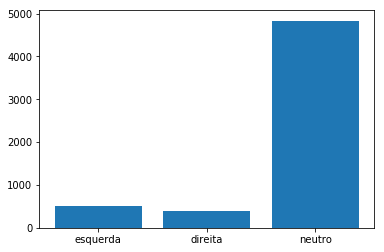

In [44]:
plt.bar(predicoesDT.keys(), predicoesDT.values())
plt.show()

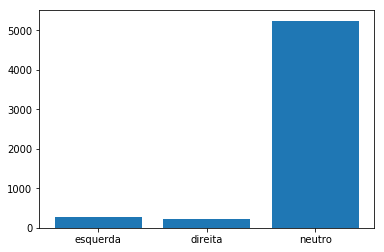

In [45]:
plt.bar(predicoesNN.keys(), predicoesNN.values())
plt.show()

## Salvar os dados de teste rótulados pelo modelo
- x contém os rótulos da DT
- y contém os rótulos da NN

In [46]:
tagsDT = []
for valor in x:
    tagsDT.append(valor)

In [47]:
tagsNN = []
for valor in y:
    tagsNN.append(valor)

- criar dois novos dataframes
- cada um com o texto e o respectivo rótulo

In [48]:
features = []
for row in df_testSet:
    features.append(row)

In [49]:
df_DT = {'text':[], 'tags':[]}
df_NN = {'text':[], 'tags':[]}

In [50]:
df_DT['text'] = features
df_DT['tags'] = tagsDT

In [51]:
df_NN['text'] = features
df_NN['tags'] = tagsNN

In [52]:
dadosDT = pd.DataFrame(data=df_DT)
dadosNN = pd.DataFrame(data=df_NN)

In [53]:
dadosDT.to_csv('../data/testeDT.csv')
dadosNN.to_csv('../data/testeNN.csv')

## Extrair uma amostra para verificar o número de acertos

In [1]:
import numpy as np

In [ ]:
df_indexs = list(dadosDT.index)

In [ ]:
indexs = np.random.choice(df_indexs,150,replace=False)

In [ ]:
amostraDT = dadosDT.iloc[indexs]

In [ ]:
amostraNN = dadosNN.iloc[indexs]

## Carregar modelos

In [54]:
modeloDT = pickle.load(open('modeloDT.sav', 'rb'))
modeloNN = pickle.load(open('modeloNN.sav', 'rb'))

In [55]:
modeloDT.predict(test)
modeloNN.predict(test)

array([2, 1, 1, ..., 1, 1, 1])

# Estatisticas


In [56]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

- Decision Tree

In [57]:
from sklearn.pipeline import Pipeline
pipeline_simples = Pipeline([
  ('counts', TfidfVectorizer()),
  ('classifier', tree.DecisionTreeClassifier() )
])

In [58]:
pipeline_simples.fit(df_reviews,df_classes)
pipeline_simples.steps

[('counts',
  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.float64'>, encoding='utf-8',
                  input='content', lowercase=True, max_df=1.0, max_features=None,
                  min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                  smooth_idf=True, stop_words=None, strip_accents=None,
                  sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, use_idf=True, vocabulary=None)),
 ('classifier',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best'))]

In [59]:
resultados = cross_val_predict(pipeline_simples, df_reviews, df_classes, cv=10)
metrics.accuracy_score(df_classes,resultados)

0.7011751538891998

- Neural Network

In [60]:
pipeline_simples = Pipeline([
  ('counts', TfidfVectorizer()),
  ('classifier', MLPClassifier() )
])

In [61]:
pipeline_simples.fit(df_reviews,df_classes)
pipeline_simples.steps

[('counts',
  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.float64'>, encoding='utf-8',
                  input='content', lowercase=True, max_df=1.0, max_features=None,
                  min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                  smooth_idf=True, stop_words=None, strip_accents=None,
                  sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, use_idf=True, vocabulary=None)),
 ('classifier',
  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
                beta_2=0.999, early_stopping=False, epsilon=1e-08,
                hidden_layer_sizes=(100,), learning_rate='constant',
                learning_rate_init=0.001, max_iter=200, momentum=0.9,
                n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
                random_state=None, shuffle=True, solver='adam', tol=0.0001,
                validati

In [62]:
resultados = cross_val_predict(pipeline_simples, df_reviews, df_classes, cv=10)
metrics.accuracy_score(df_classes,resultados)

0.7257974258533856